In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [33]:
df_train_cleaned = pd.read_csv('./datasets/train_cleaned.csv')
df_test_cleaned = pd.read_csv('./datasets/test_cleaned.csv')

In [34]:
df_train_cleaned.head()

,Id,lot_area,street,land_cont,neighborhood,cond_1,cond_2,bldg_type,style,overall_qual,overall_cond,yr_built,yr_remodeled,roof_style,roof_mater,exter_1,exter_qual,exter_cond,foundation,bsmt_cond,bsmt_fin_1,bsmt_fin_1_sf,bsmt_fin_2,bsmt_fin_2_sf,bsmt_sf,heat,cent_air,gr_liv_area,full_bath,half_bath,bedrooms_gr,kitchen,kitch_qual,tot_rooms_gr,fireplaces,garage_type,garage_car_size,garage_cond,paved_drive,misc_val,year_sold,sale_price,has_pool
0,109,13517,Pave,Lvl,Sawyer,RRA,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Gd,TA,CBlock,TA,GLQ,533.0,Unf,0.0,725.0,GasA,Y,1479,2,1,3,1,Gd,6,0,Attchd,2,TA,Y,0,2010,130500,0
1,544,11492,Pave,Lvl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,Gd,TA,PConc,TA,GLQ,637.0,Unf,0.0,913.0,GasA,Y,2122,2,1,4,1,Gd,8,1,Attchd,2,TA,Y,0,2009,220000,0
2,153,7922,Pave,Lvl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,TA,Gd,CBlock,TA,GLQ,731.0,Unf,0.0,1057.0,GasA,Y,1057,1,0,3,1,Gd,5,0,Detchd,1,TA,Y,0,2010,109000,0
3,318,9802,Pave,Lvl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,TA,TA,PConc,TA,Unf,0.0,Unf,0.0,384.0,GasA,Y,1444,2,1,3,1,TA,7,0,BuiltIn,2,TA,Y,0,2010,174000,0
4,255,14235,Pave,Lvl,SawyerW,Norm,Norm,1Fam,Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,TA,TA,PConc,Gd,Unf,0.0,Unf,0.0,676.0,GasA,Y,1445,2,0,3,1,TA,6,0,Detchd,2,TA,N,0,2010,138500,0


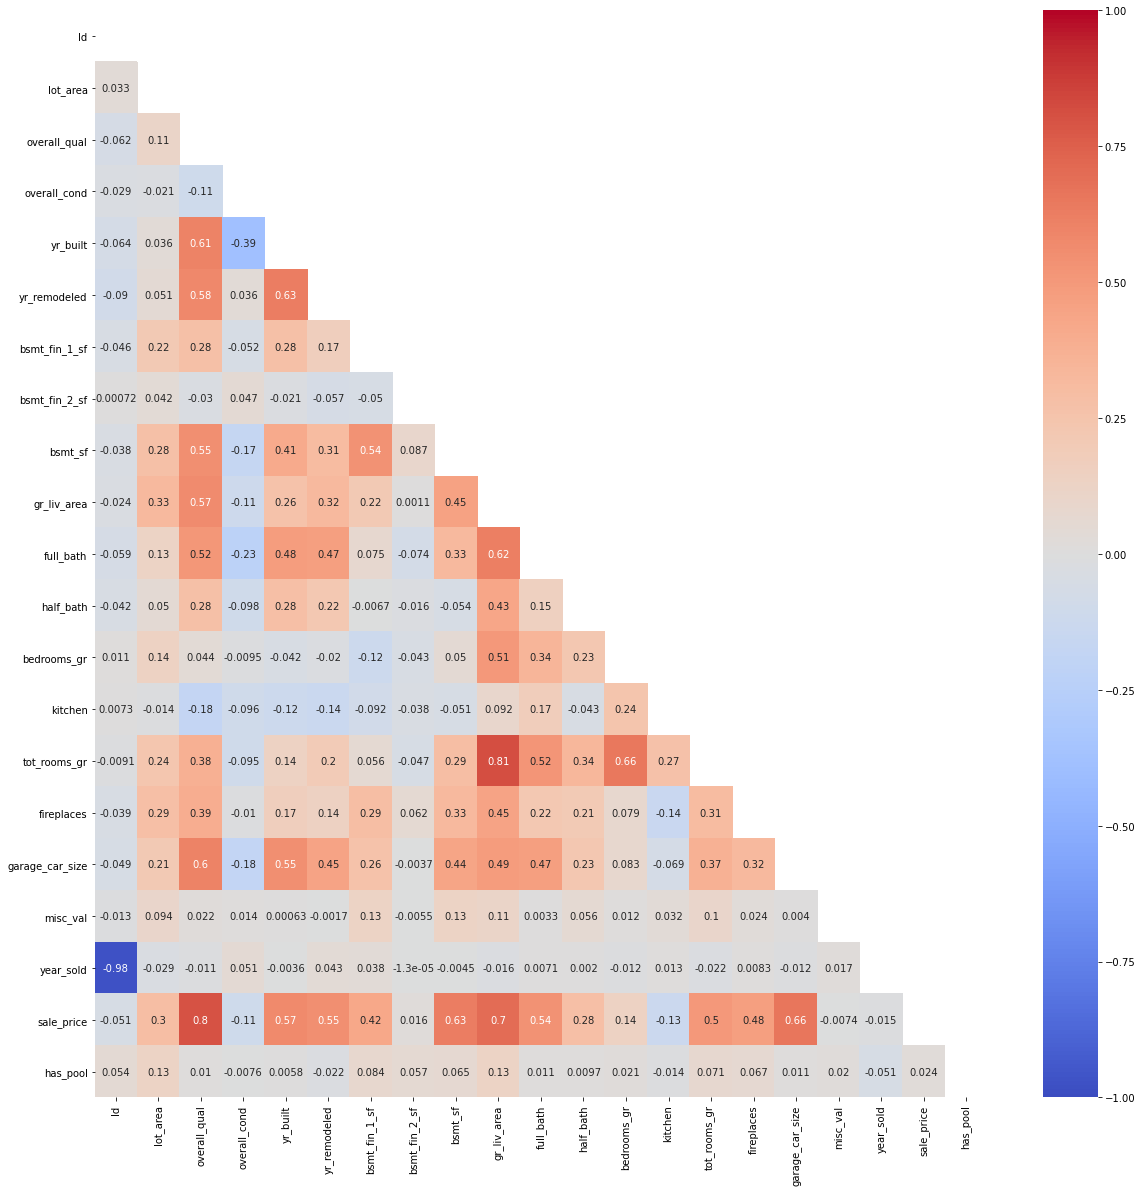

In [35]:
corr = df_train_cleaned.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 20))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, cmap='coolwarm');

In [61]:
# Feature engineering

def feat_eng(df):
    df['tot_rooms_gr_gr_liv_area'] = df['tot_rooms_gr'] * df['gr_liv_area']
    df['tot_rooms_gr_bedroom_gr'] = df['tot_rooms_gr'] * (df['bedrooms_gr'] + 1)
    df['full_bath_gr_liv_area'] = (df['full_bath'] + 1) * df['gr_liv_area']
    df['gar_car_size_overall_qual'] = df['garage_car_size'] * df['overall_qual']
    df['gar_car_size_overall_qual'] = df['garage_car_size'] * df['overall_qual']
    df['yr_built_overall_qual'] = df['yr_built'] * df['overall_qual']
    
    # Features to convert to logs
    df['full_bath_gr_liv_area_log'] = df['full_bath_gr_liv_area'].map(np.log)
    df['sale_price_log'] = df['sale_price'].map(np.log)
    df['tot_rooms_gr_bedroom_gr_log'] = df['tot_rooms_gr_bedroom_gr'].map(np.log)
    
    return df

In [62]:
# df_train_cleaned['bedrooms_gr'].sort_values()

In [63]:
df_train_cleaned_eng = feat_eng(df_train_cleaned)
df_train_cleaned_eng.head()

,Id,lot_area,street,land_cont,neighborhood,cond_1,cond_2,bldg_type,style,overall_qual,overall_cond,yr_built,yr_remodeled,roof_style,roof_mater,exter_1,exter_qual,exter_cond,foundation,bsmt_cond,bsmt_fin_1,bsmt_fin_1_sf,bsmt_fin_2,bsmt_fin_2_sf,bsmt_sf,heat,cent_air,gr_liv_area,full_bath,half_bath,bedrooms_gr,kitchen,kitch_qual,tot_rooms_gr,fireplaces,garage_type,garage_car_size,garage_cond,paved_drive,misc_val,year_sold,sale_price,has_pool,tot_rooms_gr_gr_liv_area,tot_rooms_gr_bedroom_gr,full_bath_gr_liv_area,gar_car_size_overall_qual,yr_built_overall_qual,full_bath_gr_liv_area_log,bsmt_sf_log,sale_price_log,tot_rooms_gr_bedroom_gr_log
0,109,13517,Pave,Lvl,Sawyer,RRA,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Gd,TA,CBlock,TA,GLQ,533.0,Unf,0.0,725.0,GasA,Y,1479,2,1,3,1,Gd,6,0,Attchd,2,TA,Y,0,2010,130500,0,8874,24,4437,12,11856,8.397734,6.586172,11.779129,3.178054
1,544,11492,Pave,Lvl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,Gd,TA,PConc,TA,GLQ,637.0,Unf,0.0,913.0,GasA,Y,2122,2,1,4,1,Gd,8,1,Attchd,2,TA,Y,0,2009,220000,0,16976,40,6366,14,13972,8.758727,6.816736,12.301383,3.688879
2,153,7922,Pave,Lvl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,TA,Gd,CBlock,TA,GLQ,731.0,Unf,0.0,1057.0,GasA,Y,1057,1,0,3,1,Gd,5,0,Detchd,1,TA,Y,0,2010,109000,0,5285,20,2114,5,9765,7.656337,6.963190,11.599103,2.995732
3,318,9802,Pave,Lvl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,TA,TA,PConc,TA,Unf,0.0,Unf,0.0,384.0,GasA,Y,1444,2,1,3,1,TA,7,0,BuiltIn,2,TA,Y,0,2010,174000,0,10108,28,4332,10,10030,8.373785,5.950643,12.066811,3.332205
4,255,14235,Pave,Lvl,SawyerW,Norm,Norm,1Fam,Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,TA,TA,PConc,Gd,Unf,0.0,Unf,0.0,676.0,GasA,Y,1445,2,0,3,1,TA,6,0,Detchd,2,TA,N,0,2010,138500,0,8670,24,4335,12,11400,8.374477,6.516193,11.838626,3.178054


In [64]:
# df_test_cleaned_eng = feat_eng(df_test_cleaned)
# df_test_cleaned_eng.head()

In [66]:
# df_train_cleaned_eng.hist(figsize=(20, 20));

In [ ]:
df_test_cleaned.to_csv('./datasets/test_cleaned_eng.csv', index=False)
df_train_cleaned.to_csv('./datasets/train_cleaned_eng.csv', index=False)